### Desafio: Prever a diferença de ouro (blueGoldDiff) a partir de estatísticas gerais da partida.

In [26]:
#Importar bibliotecas
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

In [27]:
#1. Carregar base de dados
df = pd.read_csv('../../datasets/high_diamond_ranked_10min.csv')

#2. Definir variáveis
target = "blueGoldDiff"
cols_to_drop = [
    "gameId", "blueWins", "blueGoldDiff", "redGoldDiff",
    "blueTotalGold", "redTotalGold", "blueGoldPerMin", "redGoldPerMin"
]

features = df.drop(columns=cols_to_drop)

X = features
y = df[target]

Modelos escolhidos para comparação: Regressão Linear e Random Forest Regressor.

In [ ]:
#3. Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

#4. Treinar modelos
lr = LinearRegression()
rf = RandomForestRegressor(random_state=42, n_estimators=100)

lr.fit(X_train, y_train)
rf.fit(X_train, y_train)

#5. Fazer previsões
y_pred_lr = lr.predict(X_test)
y_pred_rf = rf.predict(X_test)

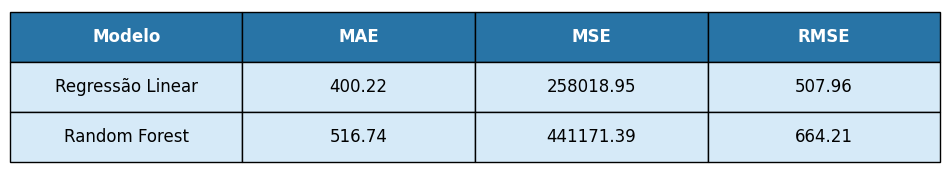

In [29]:
#6. Calcular métricas
def avaliar_modelo(nome, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return {"Modelo": nome, "MAE": mae, "MSE": mse, "RMSE": rmse}

resultados = []
resultados.append(avaliar_modelo("Regressão Linear", y_test, y_pred_lr))
resultados.append(avaliar_modelo("Random Forest", y_test, y_pred_rf))

df_resultados = pd.DataFrame(resultados).round(2)

fig, ax = plt.subplots(figsize=(6, 2))
ax.axis('off')

table = ax.table(
    cellText=df_resultados.values,
    colLabels=df_resultados.columns,
    cellLoc='center',
    loc='center'
)

table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(2, 3)

for (row, col), cell in table.get_celld().items():
    if row == 0:
        cell.set_facecolor('#2874A6')
        cell.set_text_props(color='white', weight='bold')
    else:
        cell.set_facecolor('#D6EAF8')

plt.show()

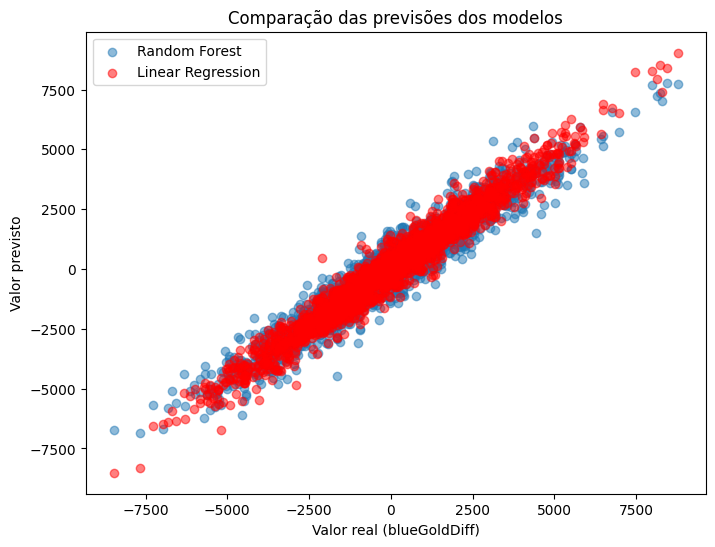

In [30]:
#7. Comparação visual
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_rf, alpha=0.5, label='Random Forest')
plt.scatter(y_test, y_pred_lr, alpha=0.5, label='Linear Regression', color='red')
plt.xlabel("Valor real (blueGoldDiff)")
plt.ylabel("Valor previsto")
plt.legend()
plt.title("Comparação das previsões dos modelos")
plt.show()

Conclusão:
O modelo linear mostrou-se mais eficiente para este conjunto de dados, indicando que a relação entre as variáveis e a diferença de ouro é predominantemente linear.
Modelos mais complexos, como Random Forest, não trouxeram ganhos significativos.